In [3]:
%matplotlib inline

In [4]:
import os
import numpy as np
import json
from ipywidgets import interact
import matplotlib.pyplot as plt
import matplotlib.cm as cm
if 'cd' not in globals():
    cd = True
    os.chdir('..')

In [5]:
def get_cer(plot_dir):
    data = []
    for folder in os.listdir(plot_dir):
            if folder.startswith('snapshot.ep.'):
                ep = int(folder.strip('snapshot.ep.'))
                with open(f'{plot_dir}/{folder}/result.txt', 'r', encoding="utf-8") as f:
                    for l in f:
                        if 'Sum/Avg' in l:
                            pter = float(l.strip().strip('|').strip().split()[-2])
                            data.append((ep, pter))
                            break

    data = sorted(data, key=lambda x: x[0])
    eps, pters = zip(*data)
    return np.array(eps), np.array(pters)

def get_cer_with_cache(plot_dir, cache_data):
    if plot_dir in cache_data:
        eps, pters = cache_data[plot_dir]
    else:
        eps, pters = get_cer(plot_dir)
        cache_data[plot_dir] = eps, pters
    return eps, pters


In [6]:
import pickle as pk
with open('phones/lang2ph.json', 'r') as f:
    lang2ph = json.load(f)
    
def count_common_phone(l1, l2):
    nl1 = len(lang2ph[l1])
    nl2 = len(lang2ph[l2])
    nc = len(set(lang2ph[l1]).intersection(lang2ph[l2]))
#     print(f'{l1}: #{nl1} {l2}: #{nl2} common: #{nc}')
    s = f'{l1}: #{nl1} {l2}: #{nl2} common: #{nc}'
    return s

# LEMB

In [5]:
recog_langs = ['Spanish', 'Polish', 'Croatian', '203', '101']
fake_lang_labels = ['CR', 'PL', 'SP', 'PO', 'TU', 'GE', 'BG', 'TH', 'CH', 'FR', 'CZ', '203', '101', 'N', '404', '402', '307', '206', '107', '103']
langs = ['Croatian', 'Polish', 'Spanish', 'Portuguese', 'Turkish', 'German', 'Bulgarian', 'Thai', 'Mandarin', 'French', 'Czech', '203', '101', '505', '404', '402', '307', '206', '107', '103']
lang_labels = ['CR', 'PL', 'SP', 'PO', 'TU', 'GE', 'BG', 'TH', 'CH', 'FR', 'CZ', '203', '101', 'N', '404', '402', '307', '206', '107', '103']
train_langs = ['Portuguese', 'Turkish', 'German', 'Bulgarian', 'Thai', 'Mandarin', 'French', 'Czech', '505', '404', '402', '307', '206', '107', '103']
lang2label = {lang: label for lang, label in zip(langs, lang_labels)}

In [6]:
cache_data = {}

### linear language embedding test pter with fake labels
- Spanish
    - 
- Polish
    - 
- Croatian
    - 

In [7]:
max_epoch = 30
# fake_lang_labels=['CR']
@interact
def update(i_recog_lang=(0,len(recog_langs)-1), others=True):
    recog_lang = recog_langs[i_recog_lang]
    print(recog_lang)
    plt.figure(figsize=(20,12))
#     if others:
    for ii, fll in enumerate(fake_lang_labels):
        plot_dir = f'exp/train_pytorch_wav2vecfexlemb/plot_eval_{recog_lang}_{fll}_decode'
        if not os.path.exists(plot_dir):
            continue
        eps, pters = get_cer_with_cache(plot_dir, cache_data)
        alpha = 0 if not others and fll != lang2label[recog_lang] else 1
        plt.plot(eps, pters, label=f'{recog_lang}_'+fll, alpha=alpha)
        min_ep = eps[np.argmin(pters)]
        if others:
            plt.text(eps[ii%max_epoch], pters[ii%max_epoch], f'{fll}')

    # baseline
    ll = lang2label[recog_lang]
    plot_dir = f'exp/train_pytorch_wav2vecfex/plot_eval_{recog_lang}_{ll}_decode'
#     if os.path.exists(plot_dir):
        
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.plot(eps, pters, label=f'{recog_lang}_base', linestyle='--')
    
    plot_dir = f'exp/train_pytorch_wav2vecfex/plot_mask_eval_{recog_lang}_{ll}_decode'
       
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.plot(eps, pters, label=f'{recog_lang}_basemask', linestyle='--')

    plt.legend()

interactive(children=(IntSlider(value=2, description='i_recog_lang', max=4), Checkbox(value=True, description=…

In [78]:

# fake_lang_labels=['CR']
@interact
def update(i_recog_lang=(0,len(recog_langs)-1), i_fake_lang_label=(0,len(fake_lang_labels)-1)):
    recog_lang = recog_langs[i_recog_lang]
    fll = fake_lang_labels[i_fake_lang_label]
    print(recog_lang, fll)
    plt.figure(figsize=(20,12))
#     for fll in fake_lang_labels:
    plot_dir = f'exp/train_pytorch_wav2vecfexlemb/plot_eval_{recog_lang}_{fll}_decode'
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.plot(eps, pters, label=f'{recog_lang}_'+fll)
    min_ep = eps[np.argmin(pters)]
    # baseline
    ll = lang2label[recog_lang]
    plot_dir = f'exp/train_pytorch_wav2vecfex/plot_eval_{recog_lang}_{ll}_decode'
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.plot(eps, pters, label=f'{recog_lang}_'+'base', linestyle='--')
#         common_s = count_common_phone(lang2langlabel[recog_lang], fll)
#         print(f'Lang: {recog_lang} Lang_label: {fll} min_ep: {min_ep} min_pter: {np.min(pters)} {common_s}')
        
    plt.legend()

interactive(children=(IntSlider(value=2, description='i_recog_lang', max=4), IntSlider(value=9, description='i…

### linear language embedding test pter with fake labels and mask

In [46]:
family_dict = {
    'Croatian': ['CZ', 'PL', 'BG'],
    'Polish': ['CZ', 'CR', 'BG'],
    'Spanish': ['PO', 'FR'],
    '203': ['TH'],
    '101': ['CH'],
}

In [75]:
max_epoch = 30
# fake_lang_labels=['CR']
@interact
def update(i_recog_lang=(0,len(recog_langs)-1), others=True):
    recog_lang = recog_langs[i_recog_lang]
    ll = lang2label[recog_lang]
    print(recog_lang)
    plt.figure(figsize=(20,12), dpi=100)
    for ii, fll in enumerate(fake_lang_labels):
        plot_dir = f'exp/train_pytorch_wav2vecfexlemb/plot_mask_eval_{recog_lang}_{fll}_decode'
        if not os.path.exists(plot_dir):
            continue
        eps, pters = get_cer_with_cache(plot_dir, cache_data)
        alpha = 0 if not others and fll != lang2label[recog_lang] else 1
        if alpha != 0:
            if fll in family_dict[recog_lang]:
                alpha = 0.8
                linestyle = 'dashdot'
                linewidth = 3
            elif fll == lang2label[recog_lang]:
                alpha = 1
                linestyle = '-'
                linewidth = 5
            else:
                alpha = 0.5
                linestyle = 'dotted'
                linewidth = 3
        plt.plot(eps, pters, label=f'{ll}_'+fll, alpha=alpha, linestyle=linestyle, linewidth=linewidth)
        min_ep = eps[np.argmin(pters)]
        if others:
            plt.text(eps[ii%max_epoch], pters[ii%max_epoch], f'{fll}', fontsize=20)
    # baseline
    
    plot_dir = f'exp/train_pytorch_wav2vecfex/plot_eval_{recog_lang}_{ll}_decode'
#     if os.path.exists(plot_dir):
        
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.scatter(eps, pters, label=f'{ll}_w2v', marker='^', linewidth=3)
    
    plot_dir = f'exp/train_pytorch_wav2vecfex/plot_mask_eval_{recog_lang}_{ll}_decode'
       
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.scatter(eps, pters, label=f'{ll}_w2v+mask', marker='^', linewidth=3)
    #         common_s = count_common_phone(lang2langlabel[recog_lang], fll)
    #         print(f'Lang: {recog_lang} Lang_label: {fll} min_ep: {min_ep} min_pter: {np.min(pters)} {common_s}')

    legend = plt.legend(ncol=2,fontsize=18)
#     legend = plt.legend(loc="upper right", edgecolor="black")
    legend.get_frame().set_alpha(None)
    legend.get_frame().set_facecolor((1, 1, 1, 0.5))
    plt.savefig(f'plots/lemb_{recog_lang}')

interactive(children=(IntSlider(value=2, description='i_recog_lang', max=4), Checkbox(value=True, description=…

# LGCN

In [ ]:
### GCN language embedding test pter with fake labels
- Spanish
    - 103 (Bengali), SP, PO
- Polish
    - PL, 404 (Georgian), 402 (Javanese), CR, CZ
- Croatian
    - 103 (Bengali), PL, 

In [77]:
max_epoch = 30
# fake_lang_labels=['CR']
@interact
def update(i_recog_lang=(0,len(recog_langs)-1), others=True):
    recog_lang = recog_langs[i_recog_lang]
    print(recog_lang)
    plt.figure(figsize=(20,12))
    for ii, fll in enumerate(fake_lang_labels):
        plot_dir = f'exp/train_pytorch_wav2vecfexlgcn/plot_eval_{recog_lang}_{fll}_decode'
        if not os.path.exists(plot_dir):
            continue
        eps, pters = get_cer_with_cache(plot_dir, cache_data)
        alpha = 0 if not others and fll != lang2label[recog_lang] else 1
        plt.plot(eps, pters, label=f'{recog_lang}_'+fll, alpha=alpha)
        min_ep = eps[np.argmin(pters)]
        if others:
            plt.text(eps[ii%max_epoch], pters[ii%max_epoch], f'{fll}')
    # baseline
    ll = lang2label[recog_lang]
    plot_dir = f'exp/train_pytorch_wav2vecfex/plot_eval_{recog_lang}_{ll}_decode'
#     if os.path.exists(plot_dir):
        
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.plot(eps, pters, label=f'{recog_lang}_base', linestyle='--')
    
    plot_dir = f'exp/train_pytorch_wav2vecfex/plot_mask_eval_{recog_lang}_{ll}_decode'
       
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.plot(eps, pters, label=f'{recog_lang}_basemask', linestyle='--')
    #         common_s = count_common_phone(lang2langlabel[recog_lang], fll)
    #         print(f'Lang: {recog_lang} Lang_label: {fll} min_ep: {min_ep} min_pter: {np.min(pters)} {common_s}')

    plt.legend()

interactive(children=(IntSlider(value=2, description='i_recog_lang', max=4), Checkbox(value=True, description=…

In [ ]:
### GCN language embedding test pter with fake labels with mask
- Spanish
    - 103 (Bengali), SP, PO
- Polish
    - PL, 404 (Georgian), 402 (Javanese), CR, CZ
- Croatian
    - 103 (Bengali), PL, 

In [98]:
max_epoch = 30
# fake_lang_labels=['CR']
@interact
def update(i_recog_lang=(0,len(recog_langs)-1), others=True):
    recog_lang = recog_langs[i_recog_lang]
    print(recog_lang)
    plt.figure(figsize=(20,12))
    for ii, fll in enumerate(fake_lang_labels):
        plot_dir = f'exp/train_pytorch_wav2vecfexlgcn/plot_mask_eval_{recog_lang}_{fll}_decode'
        if not os.path.exists(plot_dir):
            continue
        eps, pters = get_cer_with_cache(plot_dir, cache_data)
        alpha = 0 if not others and fll != lang2label[recog_lang] else 1
        plt.plot(eps, pters, label=f'{recog_lang}_'+fll, alpha=alpha)
        min_ep = eps[np.argmin(pters)]
        if others:
            plt.text(eps[ii%max_epoch], pters[ii%max_epoch], f'{fll}')
    # baseline
    ll = lang2label[recog_lang]
    plot_dir = f'exp/train_pytorch_wav2vecfex/plot_eval_{recog_lang}_{ll}_decode'
#     if os.path.exists(plot_dir):
        
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.plot(eps, pters, label=f'{recog_lang}_base', linestyle='--')
    
    plot_dir = f'exp/train_pytorch_wav2vecfex/plot_mask_eval_{recog_lang}_{ll}_decode'
       
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.plot(eps, pters, label=f'{recog_lang}_basemask', linestyle='--')
    #         common_s = count_common_phone(lang2langlabel[recog_lang], fll)
    #         print(f'Lang: {recog_lang} Lang_label: {fll} min_ep: {min_ep} min_pter: {np.min(pters)} {common_s}')

    plt.legend()

interactive(children=(IntSlider(value=2, description='i_recog_lang', max=4), Checkbox(value=True, description=…

# w2v nonmask

In [62]:
max_epoch=30
train_langs = ['Croatian', 'Polish', 'Spanish', 'Portuguese', 'Turkish', 'German', 'Bulgarian', 'Thai', 'Mandarin', 'French', 'Czech', '203', '101', '505', '404', '402', '307', '206', '107', '103']
chosen_ep = 29
colors = cm.rainbow(np.linspace(0, 1, len(train_langs)))
# plt.figure(figsize=(20,15))
cross_pters = []
for i, lang in enumerate(train_langs):
    label = lang2label[lang]

    base_plot_dir = f'exp/train_pytorch_wav2vecfex/plot_eval_{lang}_{label}_decode'
    eps, pters = get_cer_with_cache(base_plot_dir, cache_data)
    min_ep = eps[np.argmin(pters)]
    min_pter = min(pters)

    print(f'Lang: {lang} ep: {eps[chosen_ep]} min_pter {pters[chosen_ep]}')
    cross_pters.append(str(pters[chosen_ep]))

print(','.join(train_langs))
print(','.join(cross_pters))




Lang: Croatian ep: 30 min_pter 47.3
Lang: Polish ep: 30 min_pter 66.7
Lang: Spanish ep: 30 min_pter 39.0
Lang: Portuguese ep: 30 min_pter 18.7
Lang: Turkish ep: 30 min_pter 21.0
Lang: German ep: 30 min_pter 25.1
Lang: Bulgarian ep: 30 min_pter 30.2
Lang: Thai ep: 30 min_pter 22.2
Lang: Mandarin ep: 30 min_pter 17.2
Lang: French ep: 30 min_pter 14.8
Lang: Czech ep: 30 min_pter 10.5
Lang: 203 ep: 30 min_pter 79.3
Lang: 101 ep: 30 min_pter 77.9
Lang: 505 ep: 30 min_pter 15.3
Lang: 404 ep: 30 min_pter 42.2
Lang: 402 ep: 30 min_pter 48.9
Lang: 307 ep: 30 min_pter 43.1
Lang: 206 ep: 30 min_pter 39.0
Lang: 107 ep: 30 min_pter 36.6
Lang: 103 ep: 30 min_pter 41.3
Croatian,Polish,Spanish,Portuguese,Turkish,German,Bulgarian,Thai,Mandarin,French,Czech,203,101,505,404,402,307,206,107,103
47.3,66.7,39.0,18.7,21.0,25.1,30.2,22.2,17.2,14.8,10.5,79.3,77.9,15.3,42.2,48.9,43.1,39.0,36.6,41.3


# w2v mask

In [65]:
max_epoch=30
train_langs = ['Croatian', 'Polish', 'Spanish', 'Portuguese', 'Turkish', 'German', 'Bulgarian', 'Thai', 'Mandarin', 'French', 'Czech', '203', '101', '505', '404', '402', '307', '206', '107', '103']
chosen_ep = 29
colors = cm.rainbow(np.linspace(0, 1, len(train_langs)))
# plt.figure(figsize=(20,15))
cross_pters = []
for i, lang in enumerate(train_langs):
    label = lang2label[lang]

    base_plot_dir = f'exp/train_pytorch_wav2vecfex/plot_mask_eval_{lang}_{label}_decode'
    eps, pters = get_cer_with_cache(base_plot_dir, cache_data)
    min_ep = eps[np.argmin(pters)]
    min_pter = min(pters)

    print(f'Lang: {lang} ep: {eps[chosen_ep]} min_pter {pters[chosen_ep]}')
    cross_pters.append(str(pters[chosen_ep]))

print(','.join(train_langs))
print(','.join(cross_pters))




Lang: Croatian ep: 30 min_pter 42.8
Lang: Polish ep: 30 min_pter 61.2
Lang: Spanish ep: 30 min_pter 36.8
Lang: Portuguese ep: 30 min_pter 18.7
Lang: Turkish ep: 30 min_pter 21.0
Lang: German ep: 30 min_pter 25.1
Lang: Bulgarian ep: 30 min_pter 30.2
Lang: Thai ep: 30 min_pter 22.2
Lang: Mandarin ep: 30 min_pter 17.2
Lang: French ep: 30 min_pter 14.8
Lang: Czech ep: 30 min_pter 10.5
Lang: 203 ep: 30 min_pter 76.8
Lang: 101 ep: 30 min_pter 76.5
Lang: 505 ep: 30 min_pter 15.3
Lang: 404 ep: 30 min_pter 41.7
Lang: 402 ep: 30 min_pter 48.4
Lang: 307 ep: 30 min_pter 43.1
Lang: 206 ep: 30 min_pter 38.8
Lang: 107 ep: 30 min_pter 36.6
Lang: 103 ep: 30 min_pter 41.1
Croatian,Polish,Spanish,Portuguese,Turkish,German,Bulgarian,Thai,Mandarin,French,Czech,203,101,505,404,402,307,206,107,103
42.8,61.2,36.8,18.7,21.0,25.1,30.2,22.2,17.2,14.8,10.5,76.8,76.5,15.3,41.7,48.4,43.1,38.8,36.6,41.1


# LEMB NONMASK

lgcn  Lang: Croatian ep: 30 min_pter 41.3
lgcn  Lang: Polish ep: 30 min_pter 59.8
lgcn  Lang: Spanish ep: 30 min_pter 37.3
lgcn  Lang: Portuguese ep: 30 min_pter 16.3
lgcn  Lang: Turkish ep: 30 min_pter 19.3
lgcn  Lang: German ep: 30 min_pter 23.2
lgcn  Lang: Bulgarian ep: 30 min_pter 28.2
lgcn  Lang: Thai ep: 30 min_pter 19.9
lgcn  Lang: Mandarin ep: 30 min_pter 15.9
lgcn  Lang: French ep: 30 min_pter 12.9
lgcn  Lang: Czech ep: 30 min_pter 9.1
lgcn  Lang: 203 ep: 30 min_pter 76.3
lgcn  Lang: 101 ep: 30 min_pter 74.6
lgcn  Lang: 505 ep: 30 min_pter 14.0
lgcn  Lang: 404 ep: 30 min_pter 39.1
lgcn  Lang: 402 ep: 30 min_pter 44.9
lgcn  Lang: 307 ep: 30 min_pter 39.1
lgcn  Lang: 206 ep: 30 min_pter 35.9
lgcn  Lang: 107 ep: 30 min_pter 32.6
lgcn  Lang: 103 ep: 30 min_pter 39.0
Croatian,Polish,Spanish,Portuguese,Turkish,German,Bulgarian,Thai,Mandarin,French,Czech,203,101,505,404,402,307,206,107,103
41.3,59.8,37.3,16.3,19.3,23.2,28.2,19.9,15.9,12.9,9.1,76.3,74.6,14.0,39.1,44.9,39.1,35.9,32.6,3

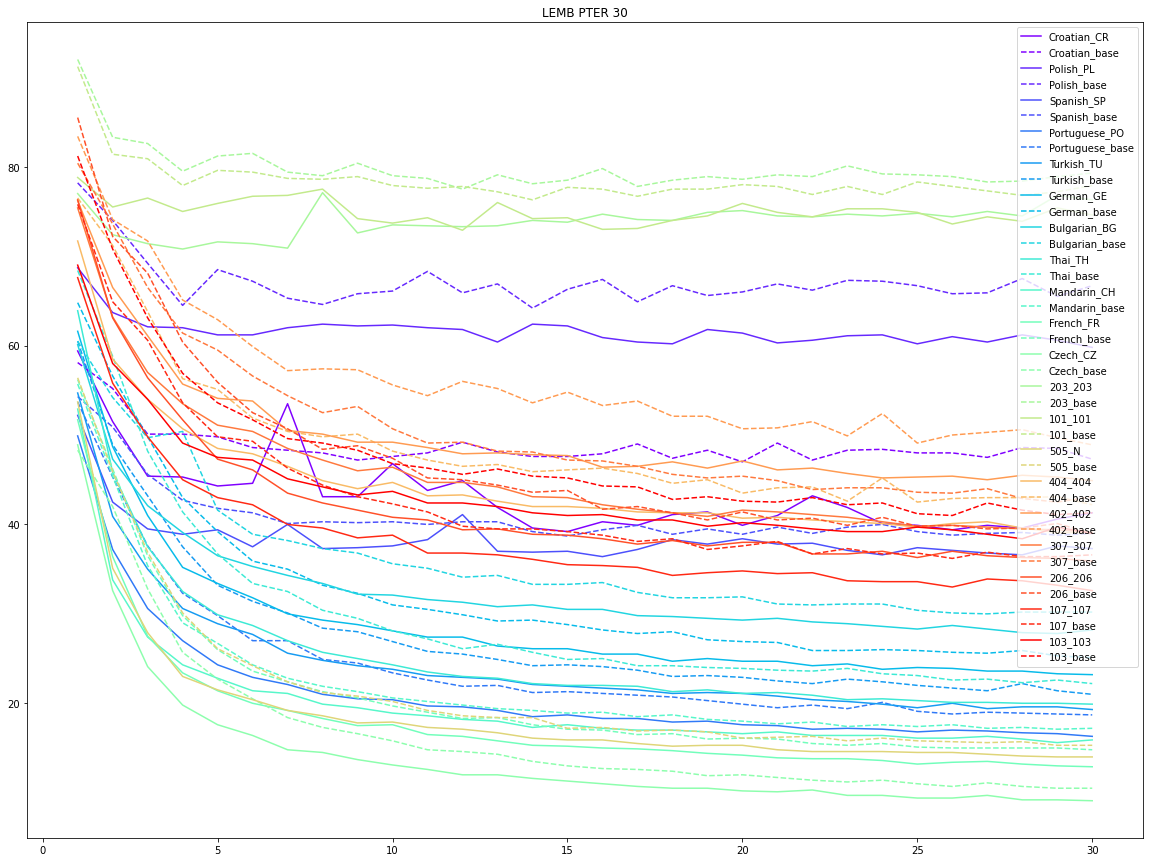

In [47]:
max_epoch=30
train_langs = ['Croatian', 'Polish', 'Spanish', 'Portuguese', 'Turkish', 'German', 'Bulgarian', 'Thai', 'Mandarin', 'French', 'Czech', '203', '101', '505', '404', '402', '307', '206', '107', '103']
chosen_ep = 29
colors = cm.rainbow(np.linspace(0, 1, len(train_langs)))
plt.figure(figsize=(20,15))
cross_pters = []
for i, lang in enumerate(train_langs):
    label = lang2label[lang]
    plot_dir = f'exp/train_pytorch_wav2vecfexlemb/plot_eval_{lang}_{label}_decode'
    base_plot_dir = f'exp/train_pytorch_wav2vecfex/plot_eval_{lang}_{label}_decode'
    if not os.path.exists(base_plot_dir): 
        continue
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.plot(eps[:max_epoch], pters[:max_epoch], label=f'{lang}_'+label, color=colors[i])
    min_ep = eps[np.argmin(pters)]
    min_pter = min(pters)
#     print(f'lgcn Lang: {lang} min_ep: {min_ep} min_pter {min_pter}')
    print(f'lgcn  Lang: {lang} ep: {eps[chosen_ep]} min_pter {pters[chosen_ep]}')
    cross_pters.append(str(pters[chosen_ep]))
    base_plot_dir = f'exp/train_pytorch_wav2vecfex/plot_eval_{lang}_{label}_decode'
    eps, pters = get_cer_with_cache(base_plot_dir, cache_data)
    plt.plot(eps[:max_epoch], pters[:max_epoch], label=f'{lang}_base', linestyle='--', color=colors[i])
    min_ep = eps[np.argmin(pters)]
    min_pter = min(pters)
#     print(f'base Lang: {lang} min_ep: {min_ep} min_pter {min_pter}')
print(','.join(train_langs))
print(','.join(cross_pters))
plt.legend()
plt.title(f'LEMB PTER {eps[chosen_ep]}')
plt.show()



# lemb mask

lgcn  Lang: Croatian ep: 30 min_pter 35.2
lgcn  Lang: Polish ep: 30 min_pter 54.0
lgcn  Lang: Spanish ep: 30 min_pter 34.4
lgcn  Lang: Portuguese ep: 30 min_pter 16.3
lgcn  Lang: Turkish ep: 30 min_pter 19.3
lgcn  Lang: German ep: 30 min_pter 23.2
lgcn  Lang: Bulgarian ep: 30 min_pter 28.2
lgcn  Lang: Thai ep: 30 min_pter 19.9
lgcn  Lang: Mandarin ep: 30 min_pter 15.9
lgcn  Lang: French ep: 30 min_pter 12.9
lgcn  Lang: Czech ep: 30 min_pter 9.1
lgcn  Lang: 203 ep: 30 min_pter 72.8
lgcn  Lang: 101 ep: 30 min_pter 73.1
lgcn  Lang: 505 ep: 30 min_pter 14.0
lgcn  Lang: 404 ep: 30 min_pter 39.1
lgcn  Lang: 402 ep: 30 min_pter 44.9
lgcn  Lang: 307 ep: 30 min_pter 39.1
lgcn  Lang: 206 ep: 30 min_pter 35.9
lgcn  Lang: 107 ep: 30 min_pter 32.6
lgcn  Lang: 103 ep: 30 min_pter 39.0
Croatian,Polish,Spanish,Portuguese,Turkish,German,Bulgarian,Thai,Mandarin,French,Czech,203,101,505,404,402,307,206,107,103
35.2,54.0,34.4,16.3,19.3,23.2,28.2,19.9,15.9,12.9,9.1,72.8,73.1,14.0,39.1,44.9,39.1,35.9,32.6,3

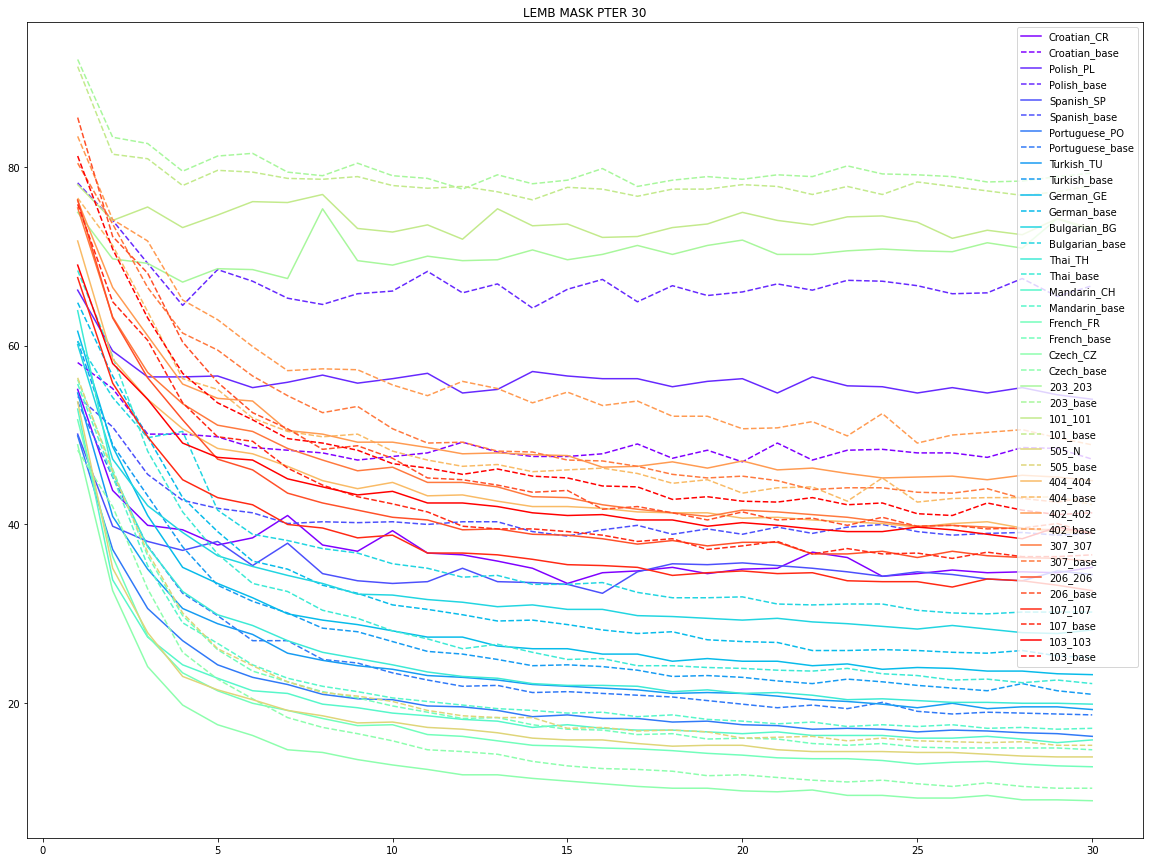

In [66]:
max_epoch=30
train_langs = ['Croatian', 'Polish', 'Spanish', 'Portuguese', 'Turkish', 'German', 'Bulgarian', 'Thai', 'Mandarin', 'French', 'Czech', '203', '101', '505', '404', '402', '307', '206', '107', '103']
chosen_ep = 29
colors = cm.rainbow(np.linspace(0, 1, len(train_langs)))
plt.figure(figsize=(20,15))
cross_pters = []
for i, lang in enumerate(train_langs):
    label = lang2label[lang]
    plot_dir = f'exp/train_pytorch_wav2vecfexlemb/plot_mask_eval_{lang}_{label}_decode'
    base_plot_dir = f'exp/train_pytorch_wav2vecfex/plot_eval_{lang}_{label}_decode'
    if not os.path.exists(base_plot_dir):
        cross_pters.append('0')
        continue
    if not os.path.exists(plot_dir):
        cross_pters.append('0')
        continue
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.plot(eps[:max_epoch], pters[:max_epoch], label=f'{lang}_'+label, color=colors[i])
    
    if len(eps) >= chosen_ep:
        min_ep = eps[np.argmin(pters)]
        min_pter = min(pters)
        print(f'lgcn  Lang: {lang} ep: {eps[chosen_ep]} min_pter {pters[chosen_ep]}')
        cross_pters.append(str(pters[chosen_ep]))
    else:
        cross_pters.append('0')
    base_plot_dir = f'exp/train_pytorch_wav2vecfex/plot_eval_{lang}_{label}_decode'
    eps, pters = get_cer_with_cache(base_plot_dir, cache_data)
    plt.plot(eps[:max_epoch], pters[:max_epoch], label=f'{lang}_base', linestyle='--', color=colors[i])
    min_ep = eps[np.argmin(pters)]
    min_pter = min(pters)
#     print(f'base Lang: {lang} min_ep: {min_ep} min_pter {min_pter}')
print(','.join(train_langs))
print(','.join(cross_pters))
plt.legend()
plt.title(f'LEMB MASK PTER {eps[chosen_ep]}')
plt.show()



In [93]:
langs = ['Croatian', 'Polish', 'Spanish', 'Portuguese', 'Turkish', 'German', 'Bulgarian', 'Thai', 'Mandarin', 'French', 'Czech', '203', '101', '505', '404', '402', '307', '206', '107', '103']
lang_labels = ['CR', 'PL', 'SP', 'PO', 'TU', 'GE', 'BG', 'TH', 'CH', 'FR', 'CZ', '203', '101', 'N', '404', '402', '307', '206', '107', '103']
train_langs = ['Portuguese', 'Turkish', 'German', 'Bulgarian', 'Thai', 'Mandarin', 'French', 'Czech', '505', '404', '402', '307', '206', '107', '103']
lang2label = {lang: label for lang, label in zip(langs, lang_labels)}

# lgcn Non-mask

lgcn  Lang: Croatian ep: 30 min_pter 50.8
lgcn  Lang: Polish ep: 30 min_pter 61.9
lgcn  Lang: Spanish ep: 30 min_pter 37.5
lgcn  Lang: Portuguese ep: 30 min_pter 16.0
lgcn  Lang: Turkish ep: 30 min_pter 18.4
lgcn  Lang: German ep: 30 min_pter 22.3
lgcn  Lang: Bulgarian ep: 30 min_pter 26.9
lgcn  Lang: Thai ep: 30 min_pter 18.9
lgcn  Lang: Mandarin ep: 30 min_pter 15.5
lgcn  Lang: French ep: 30 min_pter 12.1
lgcn  Lang: Czech ep: 30 min_pter 8.5
lgcn  Lang: 203 ep: 30 min_pter 72.4
lgcn  Lang: 101 ep: 30 min_pter 76.1
lgcn  Lang: 505 ep: 30 min_pter 13.2
lgcn  Lang: 404 ep: 30 min_pter 38.6
lgcn  Lang: 402 ep: 30 min_pter 44.2
lgcn  Lang: 307 ep: 30 min_pter 38.0
lgcn  Lang: 206 ep: 30 min_pter 35.2
lgcn  Lang: 107 ep: 30 min_pter 32.0
lgcn  Lang: 103 ep: 30 min_pter 38.2
Croatian,Polish,Spanish,Portuguese,Turkish,German,Bulgarian,Thai,Mandarin,French,Czech,203,101,505,404,402,307,206,107,103
50.8,61.9,37.5,16.0,18.4,22.3,26.9,18.9,15.5,12.1,8.5,72.4,76.1,13.2,38.6,44.2,38.0,35.2,32.0,3

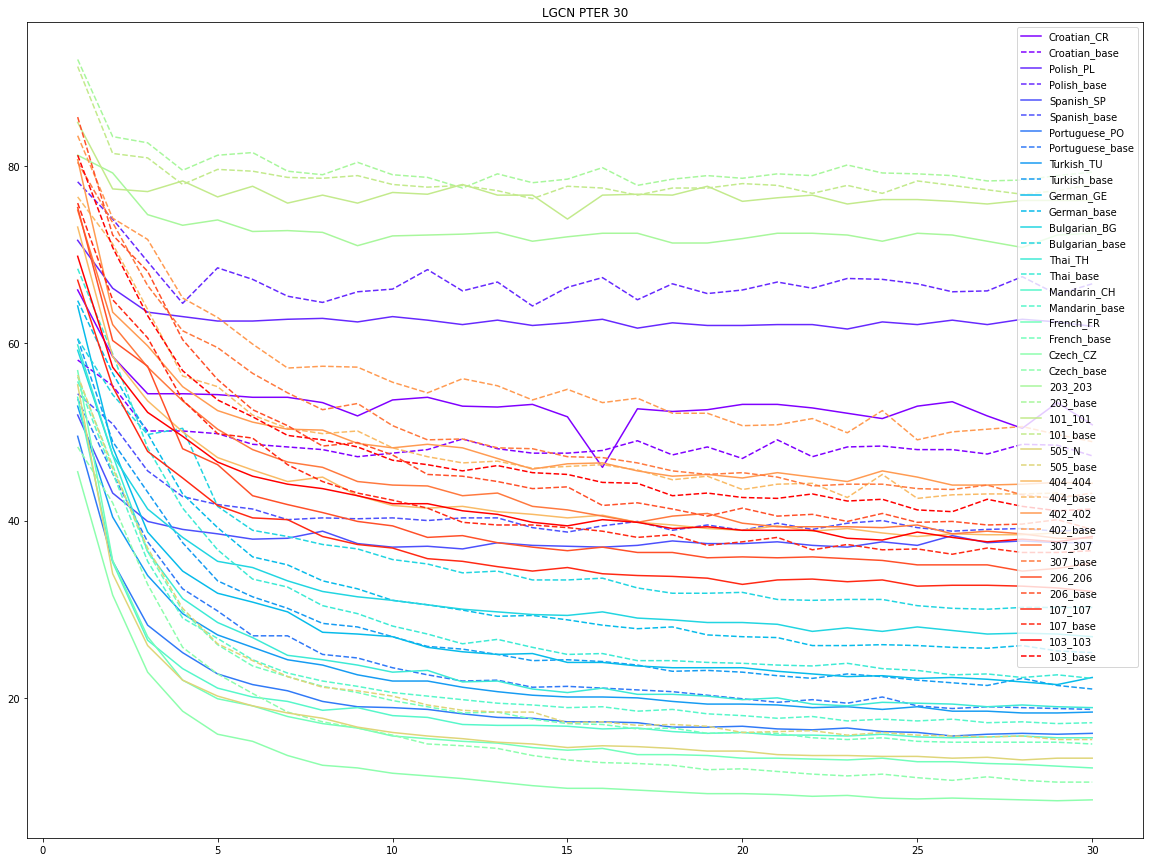

In [48]:
max_epoch=30
train_langs = ['Croatian', 'Polish', 'Spanish', 'Portuguese', 'Turkish', 'German', 'Bulgarian', 'Thai', 'Mandarin', 'French', 'Czech', '203', '101', '505', '404', '402', '307', '206', '107', '103']
chosen_ep = 29
colors = cm.rainbow(np.linspace(0, 1, len(train_langs)))
plt.figure(figsize=(20,15))
cross_pters = []
for i, lang in enumerate(train_langs):
    label = lang2label[lang]
    plot_dir = f'exp/train_pytorch_wav2vecfexlgcn/plot_eval_{lang}_{label}_decode'
    base_plot_dir = f'exp/train_pytorch_wav2vecfex/plot_eval_{lang}_{label}_decode'
    if not os.path.exists(base_plot_dir): 
        continue
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.plot(eps[:max_epoch], pters[:max_epoch], label=f'{lang}_'+label, color=colors[i])
    min_ep = eps[np.argmin(pters)]
    min_pter = min(pters)
#     print(f'lgcn Lang: {lang} min_ep: {min_ep} min_pter {min_pter}')
    print(f'lgcn  Lang: {lang} ep: {eps[chosen_ep]} min_pter {pters[chosen_ep]}')
    cross_pters.append(str(pters[chosen_ep]))
    base_plot_dir = f'exp/train_pytorch_wav2vecfex/plot_eval_{lang}_{label}_decode'
    eps, pters = get_cer_with_cache(base_plot_dir, cache_data)
    plt.plot(eps[:max_epoch], pters[:max_epoch], label=f'{lang}_base', linestyle='--', color=colors[i])
    min_ep = eps[np.argmin(pters)]
    min_pter = min(pters)
#     print(f'base Lang: {lang} min_ep: {min_ep} min_pter {min_pter}')
print(','.join(train_langs))
print(','.join(cross_pters))
plt.legend()
plt.title(f'LGCN PTER {eps[chosen_ep]}')
plt.show()



# lgcn mask

lgcn  Lang: Croatian ep: 30 min_pter 39.6
lgcn  Lang: Polish ep: 30 min_pter 56.3
lgcn  Lang: Spanish ep: 30 min_pter 35.3
lgcn  Lang: Portuguese ep: 30 min_pter 16.0
lgcn  Lang: Turkish ep: 30 min_pter 18.4
lgcn  Lang: German ep: 30 min_pter 22.3
lgcn  Lang: Bulgarian ep: 30 min_pter 26.9
lgcn  Lang: Thai ep: 30 min_pter 18.9
lgcn  Lang: Mandarin ep: 30 min_pter 15.5
lgcn  Lang: French ep: 30 min_pter 12.1
lgcn  Lang: Czech ep: 30 min_pter 8.5
lgcn  Lang: 203 ep: 30 min_pter 69.3
lgcn  Lang: 101 ep: 30 min_pter 73.1
lgcn  Lang: 505 ep: 30 min_pter 13.2
lgcn  Lang: 404 ep: 30 min_pter 38.6
lgcn  Lang: 402 ep: 30 min_pter 44.2
lgcn  Lang: 307 ep: 30 min_pter 38.0
lgcn  Lang: 206 ep: 30 min_pter 35.2
lgcn  Lang: 107 ep: 30 min_pter 32.0
lgcn  Lang: 103 ep: 30 min_pter 38.2
Croatian,Polish,Spanish,Portuguese,Turkish,German,Bulgarian,Thai,Mandarin,French,Czech,203,101,505,404,402,307,206,107,103
39.6,56.3,35.3,16.0,18.4,22.3,26.9,18.9,15.5,12.1,8.5,69.3,73.1,13.2,38.6,44.2,38.0,35.2,32.0,3

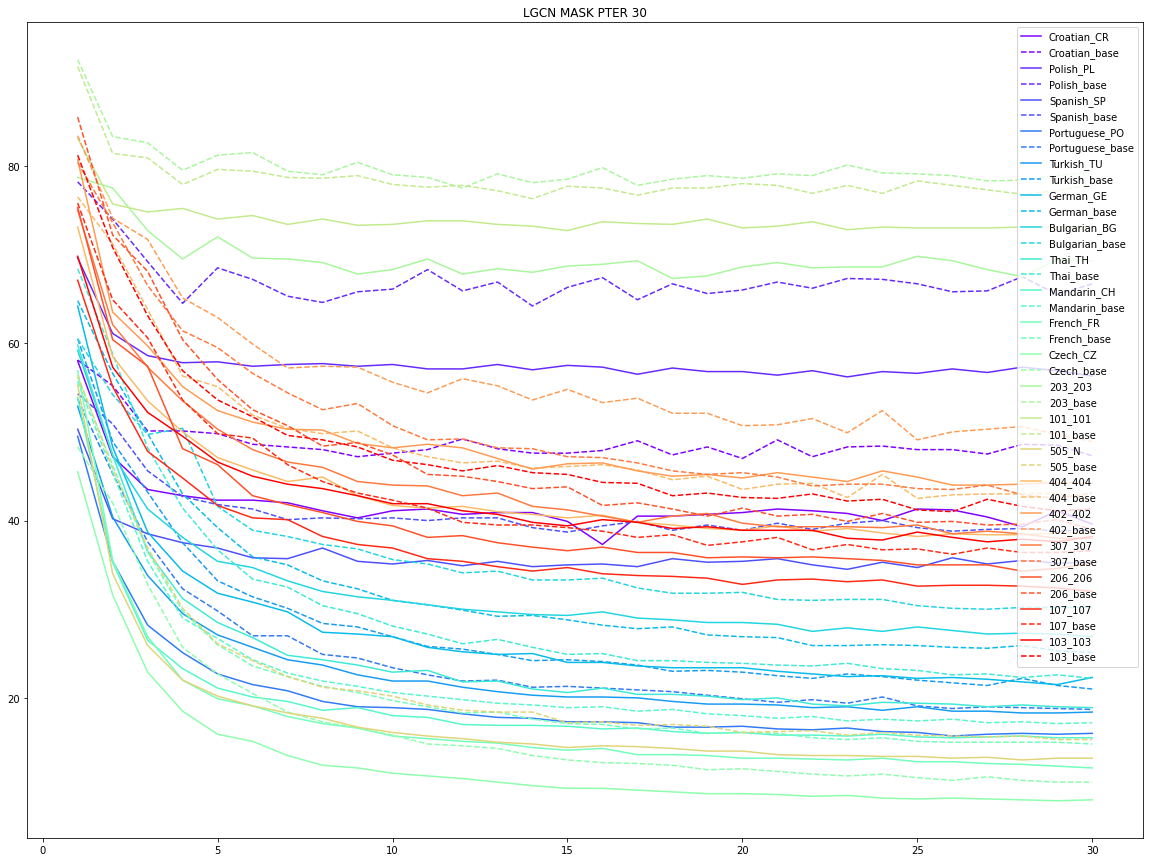

In [49]:
max_epoch=30
train_langs = ['Croatian', 'Polish', 'Spanish', 'Portuguese', 'Turkish', 'German', 'Bulgarian', 'Thai', 'Mandarin', 'French', 'Czech', '203', '101', '505', '404', '402', '307', '206', '107', '103']
chosen_ep = 29
colors = cm.rainbow(np.linspace(0, 1, len(train_langs)))
plt.figure(figsize=(20,15))
cross_pters = []
for i, lang in enumerate(train_langs):
    label = lang2label[lang]
    plot_dir = f'exp/train_pytorch_wav2vecfexlgcn/plot_mask_eval_{lang}_{label}_decode'
    base_plot_dir = f'exp/train_pytorch_wav2vecfex/plot_eval_{lang}_{label}_decode'
    if not os.path.exists(base_plot_dir): 
        continue
    eps, pters = get_cer_with_cache(plot_dir, cache_data)
    plt.plot(eps[:max_epoch], pters[:max_epoch], label=f'{lang}_'+label, color=colors[i])
    min_ep = eps[np.argmin(pters)]
    min_pter = min(pters)
#     print(f'lgcn Lang: {lang} min_ep: {min_ep} min_pter {min_pter}')
    print(f'lgcn  Lang: {lang} ep: {eps[chosen_ep]} min_pter {pters[chosen_ep]}')
    cross_pters.append(str(pters[chosen_ep]))
    base_plot_dir = f'exp/train_pytorch_wav2vecfex/plot_eval_{lang}_{label}_decode'
    eps, pters = get_cer_with_cache(base_plot_dir, cache_data)
    plt.plot(eps[:max_epoch], pters[:max_epoch], label=f'{lang}_base', linestyle='--', color=colors[i])
    min_ep = eps[np.argmin(pters)]
    min_pter = min(pters)
#     print(f'base Lang: {lang} min_ep: {min_ep} min_pter {min_pter}')
print(','.join(train_langs))
print(','.join(cross_pters))
plt.legend()
plt.title(f'LGCN MASK PTER {eps[chosen_ep]}')
plt.show()

